In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("spam.csv", encoding='ISO-8859-1')
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
row = data.iloc[5]  # Reads the 6th row (index starts from 0)
print(row)

v1                                                         spam
v2            FreeMsg Hey there darling it's been 3 week's n...
Unnamed: 2                                                  NaN
Unnamed: 3                                                  NaN
Unnamed: 4                                                  NaN
Name: 5, dtype: object


In [4]:
data.shape

(5572, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Data Cleaning

In [6]:
#Drop last 3 columns
data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [7]:
data.tail(5)

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [8]:
data.rename(columns={"v1":"Target", "v2":"Text"},inplace=True)
data.head(5)

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Encoding the Traget column values

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [10]:
data["Target"]= encoder.fit_transform(data["Target"])

In [11]:
data.head(5)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# missing value check
data.isnull().sum()

Target    0
Text      0
dtype: int64

In [13]:
data.duplicated().sum()

np.int64(403)

In [14]:
data_clean=data.drop_duplicates(keep='first')

In [15]:
data_clean.shape

(5169, 2)

## Exploratory Data Analysis

In [16]:
data_clean.head(5)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Plotting traget column

In [17]:
data_clean["Target"].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

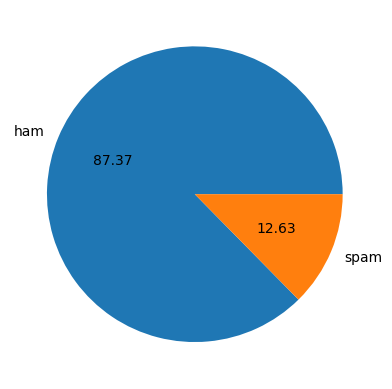

In [18]:
import matplotlib.pyplot as plt
plt.pie(data_clean["Target"].value_counts(), labels=["ham","spam"], autopct="%0.2f")
plt.show()

In [19]:
#Data is imbalanced
#!pip install nltk
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Utkarsha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Adding a column that contains number of character in a message

In [21]:
data_clean['num_characters']= data_clean['Text'].apply(len)

C:\Users\Utkarsha\AppData\Local\Temp\ipykernel_9228\3083741251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['num_characters']= data_clean['Text'].apply(len)


In [22]:
data_clean.head(5)

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


#### Adding column that contain number of words in a message

In [23]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Utkarsha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [24]:
data_clean["num_words"]= data_clean["Text"].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\Utkarsha\AppData\Local\Temp\ipykernel_9228\2921089529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean["num_words"]= data_clean["Text"].apply(lambda x: len(nltk.word_tokenize(x)))


In [25]:
data_clean.head(3)

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


#### Adding a column contains number of sentences in a message

In [26]:
data_clean["num_sentences"]=data_clean["Text"].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Utkarsha\AppData\Local\Temp\ipykernel_9228\1523750157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean["num_sentences"]=data_clean["Text"].apply(lambda x:len(nltk.sent_tokenize(x)))


In [27]:
data_clean.head(3)

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [143]:
data_clean.shape

(5169, 6)

In [28]:
data_clean[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


#### Non - spam messages

In [29]:
data_clean[data_clean["Target"]==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


#### Spam message

In [30]:
data_clean[data_clean['Target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


##### Here we can observe that spam messages average length is higher that non-spam messages

### Plotting spam & non-spam messages

In [31]:
import seaborn as sns 

<Axes: xlabel='num_characters', ylabel='Count'>

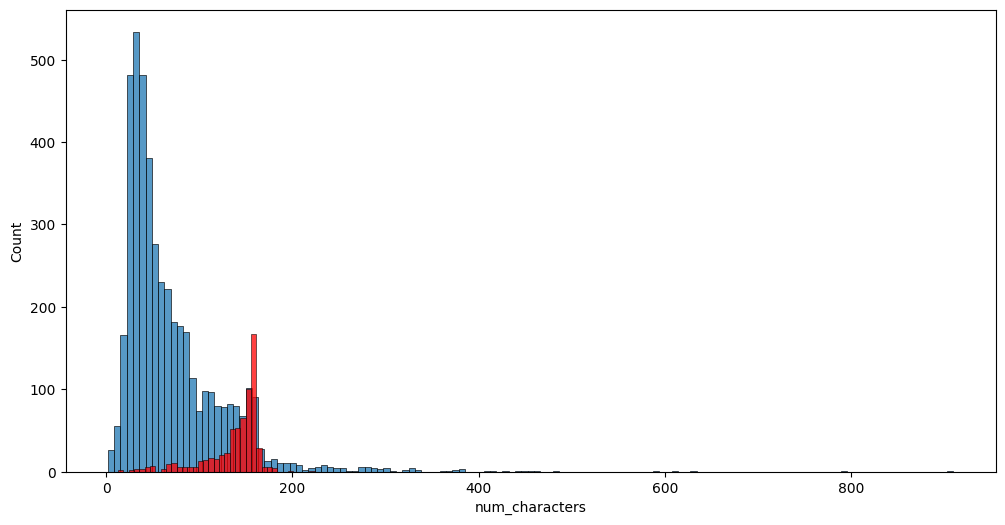

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(data_clean[data_clean['Target'] ==0]['num_characters'])
sns.histplot(data_clean[data_clean['Target'] ==1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

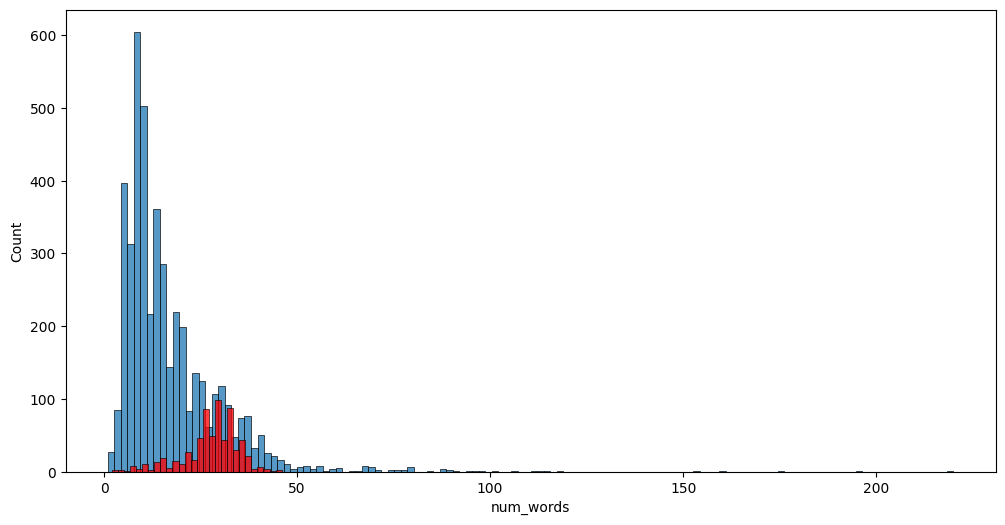

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(data_clean[data_clean['Target'] ==0]['num_words'])
sns.histplot(data_clean[data_clean['Target'] ==1]['num_words'], color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

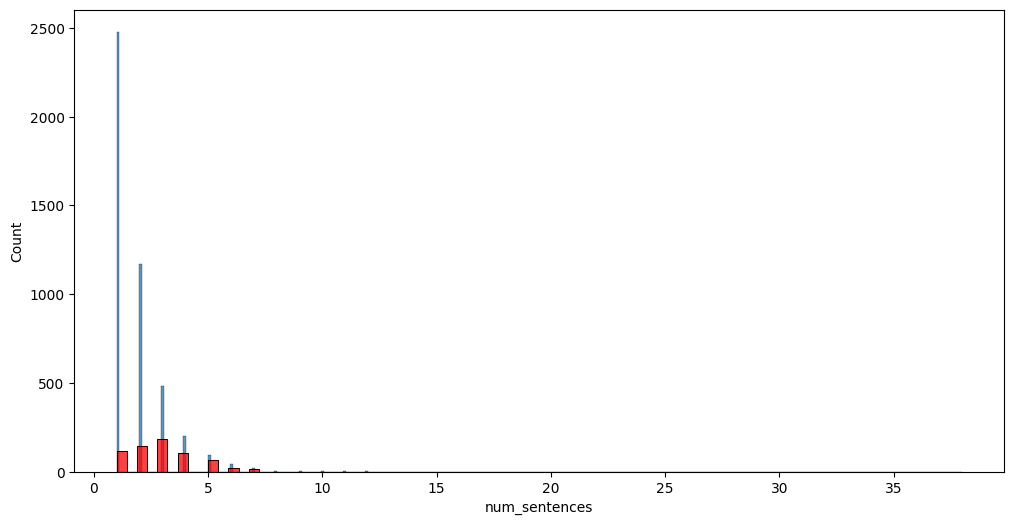

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(data_clean[data_clean['Target'] ==0]['num_sentences'])
sns.histplot(data_clean[data_clean['Target'] ==1]['num_sentences'], color='red')

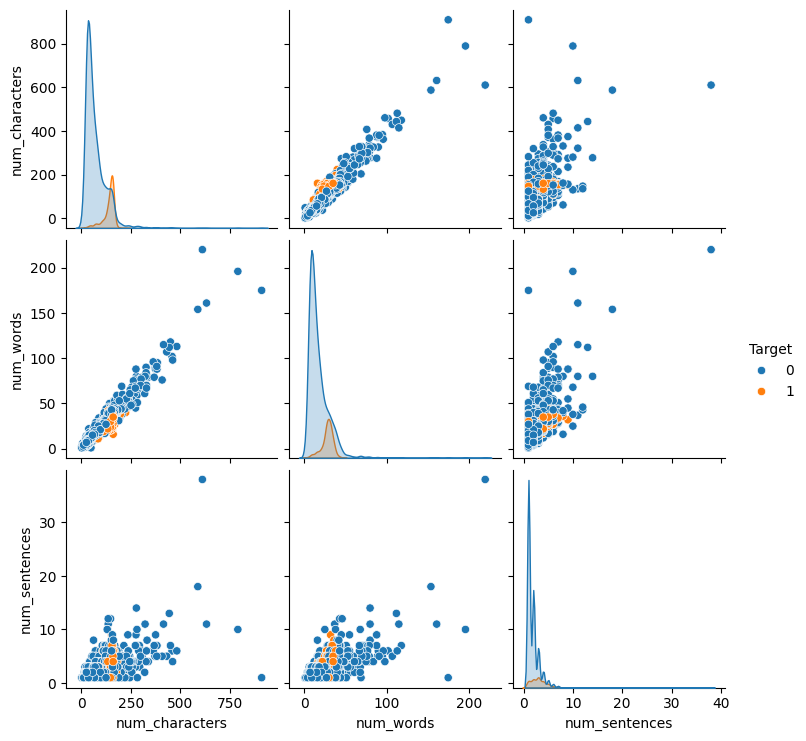

In [35]:
sns.pairplot(data_clean,hue='Target')
plt.show()

#### Plotting correlation

In [36]:
data_clean.head(5)

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [37]:
data1=data_clean.drop(columns="Text")

<Axes: >

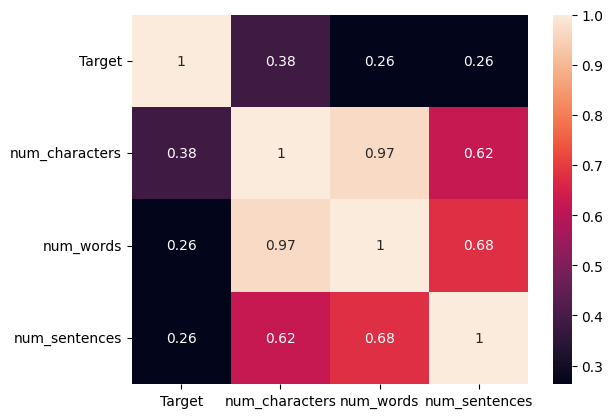

In [38]:
sns.heatmap(data1.corr(),annot=True)

### Data Preprocessing

In [39]:
# Import Porter stremmer

In [40]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [41]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Utkarsha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
import string

#### write a custom function to remve stop words and stem the words

In [43]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [44]:
transform_text("I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.")

'search right word thank breather promis wont take help grant fulfil promis wonder bless time'

In [45]:
data_clean["transform_text"]=data_clean["Text"].apply(transform_text)

C:\Users\Utkarsha\AppData\Local\Temp\ipykernel_9228\1704481344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean["transform_text"]=data_clean["Text"].apply(transform_text)


#### Applying Custom function

In [46]:
#!pip install wordcloud 

In [47]:
from wordcloud import WordCloud
wc=WordCloud(width=500, height=500,min_font_size=10, background_color='white')

In [48]:
spam_wc=wc.generate(data_clean[data_clean["Target"]==1]["transform_text"].str.cat(sep=" "))

#### Wordcloud of spam messages

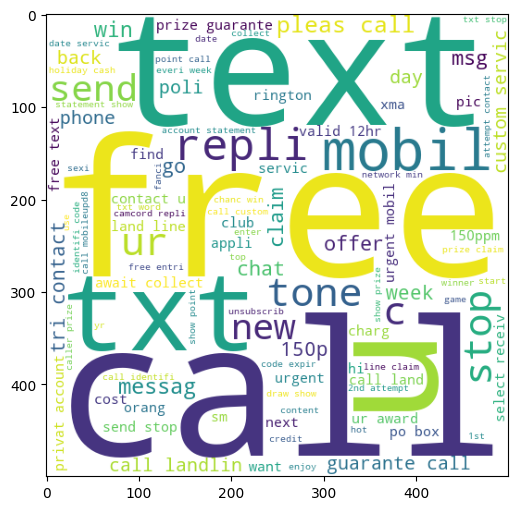

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

#### Wordcloud of non-spam

In [50]:
ham_wc=wc.generate(data_clean[data_clean['Target'] ==0]['transform_text'].str.cat(sep=" "))

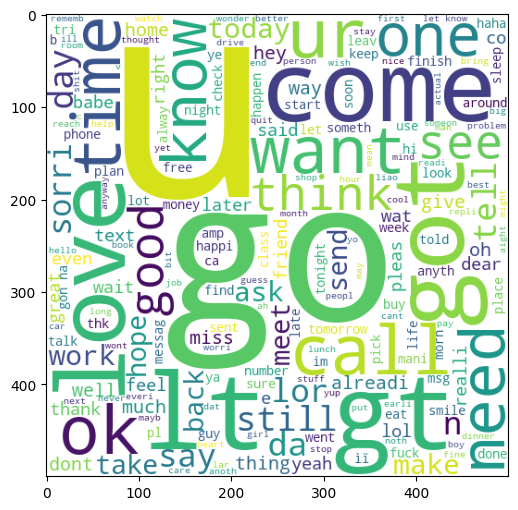

In [51]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [52]:
data_clean.head(3)

,Target,Text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [53]:
spam_corpus = []
for msg in data_clean[data_clean['Target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [54]:
len(spam_corpus)

9939

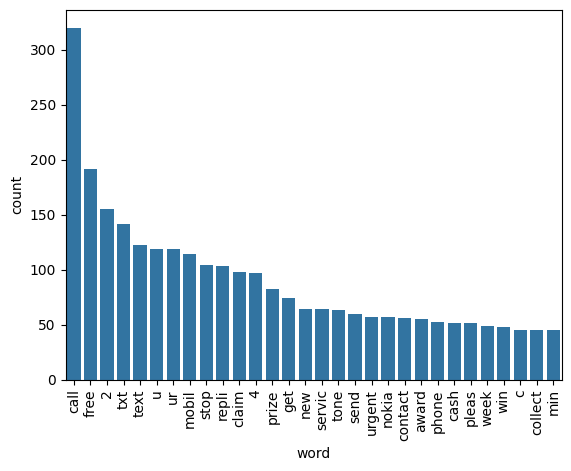

In [55]:
from collections import Counter
word_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=word_counts)
plt.xticks(rotation='vertical')
plt.show()

In [56]:
ham_corpus = []
for msg in data_clean[data_clean['Target'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [57]:
len(ham_corpus)

35404

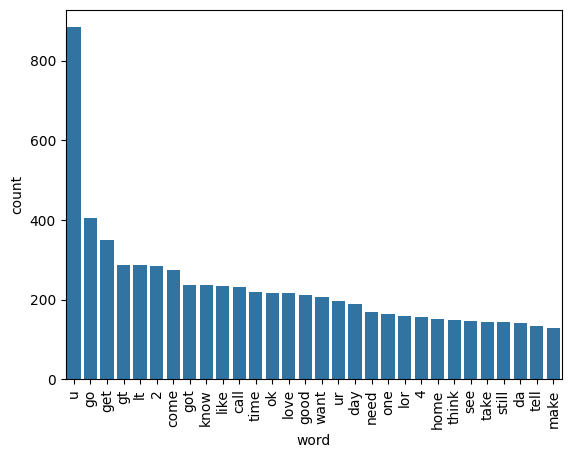

In [58]:
from collections import Counter
word_counts = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=word_counts)
plt.xticks(rotation='vertical')
plt.show()

### Model Building

In [59]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [171]:
data_clean.head()

,Target,Text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [170]:
X=tfidf.fit_transform(data_clean['transform_text']).toarray()

In [169]:
X.shape

(5169, 3000)

In [160]:
Y = data1['Target'].values

In [161]:
Y.shape

(5169,)

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
X_train, Y_train, X_test, Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

In [164]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)  # Check shapes

(4135, 3000) (1034, 3000) (4135,) (1034,)


In [165]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score

In [166]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [167]:
gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

ValueError: y should be a 1d array, got an array of shape (1034, 3000) instead.